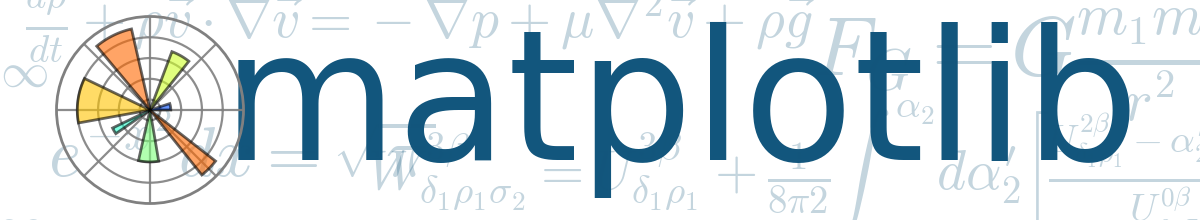

### **Hello Everyone!**

I am Gaurav Ahuja And This is a notebook which organizes various tips and contents of matplotlib.

**Matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension **NumPy**.

#will put table of content later


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Summary = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv')
Item = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv')
Info = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_info.csv')
Station = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_station_info.csv')

# 0. Setting

We set the resolution through the **dpi(Dots per Inch)** setting of the figure.

Matplotlib has a low default resolution itself, so setting this up is a bit more professional.

And We definitely want that.

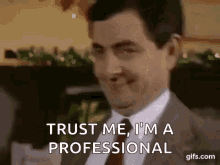

In [ ]:
plt.rcParams['figure.dpi'] = 200

In [ ]:
dpi=200

The above both Code line works the same.

And for every plot set figsize. The graph gives a very different feeling depending on the ratio.

# 1. Alignments

Two or more graphs are much more visually and semantically better than just one.

The easiest way to do this is to place the rectangles of the same shape.

Usually you can start with the initial size with subplots.

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.show()

The first of the **plt.subplot()** parameters specifies the number of rows and the second the number of columns. 

The graph looks a bit frustrating. In this case, you can use **plt.tight_layout()** to solve the frustration.

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

But should it be the same size depending on the subplot? For example, bar graphs and pie charts are often very different in ratio.

In that case, the layout should be different.

In that case, you can easily use the grid system using **plt.subplot2grid**. 

In [ ]:
# With Subplot2grid

fig = plt.figure(figsize=(8,5))  
#Figure Initialized

ax = [None for _ in range(6)]
#this will make a list to save many ax for setting parameter in each one.

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish:)
    ax[ix].set_xticks([]) # to remove x ticks
    ax[ix].set_yticks([]) # to remove y ticks
    
fig.tight_layout()
plt.show()


Or You can use **plt.add_axes()** to create an ax where you want.

In [ ]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.show()

Another way is to use gridspec. This allows you to use **add_subplot together**, similar to subplots to grid.

This approach allows you to take advantage of the concept of list to use a developer-friendly grid

In [ ]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

# 2. ColorMap

Color is a major factor in creating effective charts. A good set of colors will highlight the story you want the data to tell, while a poor one will hide or distract from a visualization’s purpose.

The matplotlib team has already created a good color palette, and we just need to use it.

Now, This is a very interesting article that you all can read for same matter : 
[How to Choose Colors for Your Data Visualizations](http://https://medium.com/nightingale/how-to-choose-the-colors-for-your-data-visualizations-50b2557fa335)

### Diverging Colormap

This colormap is usually used in visualizations where the median is obvious.

It is usually visualized on a white background, white in the center, and darker in color toward both ends. In other words, the lighter the value, the closer to the center, the darker, the closer to the end.

Currently it is a continuous colormap, but you can also use discrete colorpalette depending on the interval.Matplotlib loads the library's palette with that element in the cmap parameter. You can, of course, make it custom.

In [ ]:
from collections import OrderedDict
cmaps = OrderedDict()
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

### Qualitative Colormap

A palette of independent colors, often used for categorical variables.

It is recommended to organize up to 10 colors, and to group more and smaller categories with other.

Repeating colors can be confusing, so try to avoid overlapping as much as possible. It's a good idea to change color to color rather than saturation and brightness.

In [ ]:
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

### Sequential Colormap

This palette is appropriate for variables with numbers or sorted values.

Used a lot in comparison of figures. Especially effective for expressing density. Take advantage of map graphs for better visualization.

Similar to diverging, but with a slightly different part because each endpoint is a color criterion, not the median. It usually indicates that light values are dark on dark backgrounds and dark values on light backgrounds.


In [ ]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

Thses are some of the colormap that i use usually but there are amny more.

See All the colormap avalabile on the matplotlib library here : [Matplotlib Documentation](http://https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

We'll show the range of each colormap. 

In [ ]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()